<a href="https://colab.research.google.com/github/BxMild/Python_dataviz2024/blob/main/final_dataviz_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

โหลดข้อมูล Metabolites จำนวน 51 samples จาก https://drive.google.com/drive/folders/18BGc4-dxHwuSB6ep3PmHa688Fiww23CI?usp=sharing
ซี่งประกอบด้วยค่า X ขนาด 51x65536 ซึ่งเป็นค่าความเข้มข้นขององค์ประกอบ และ ppm ขนาด 65536 ซึ่งเป็นค่า Chemical shift
ดังรูป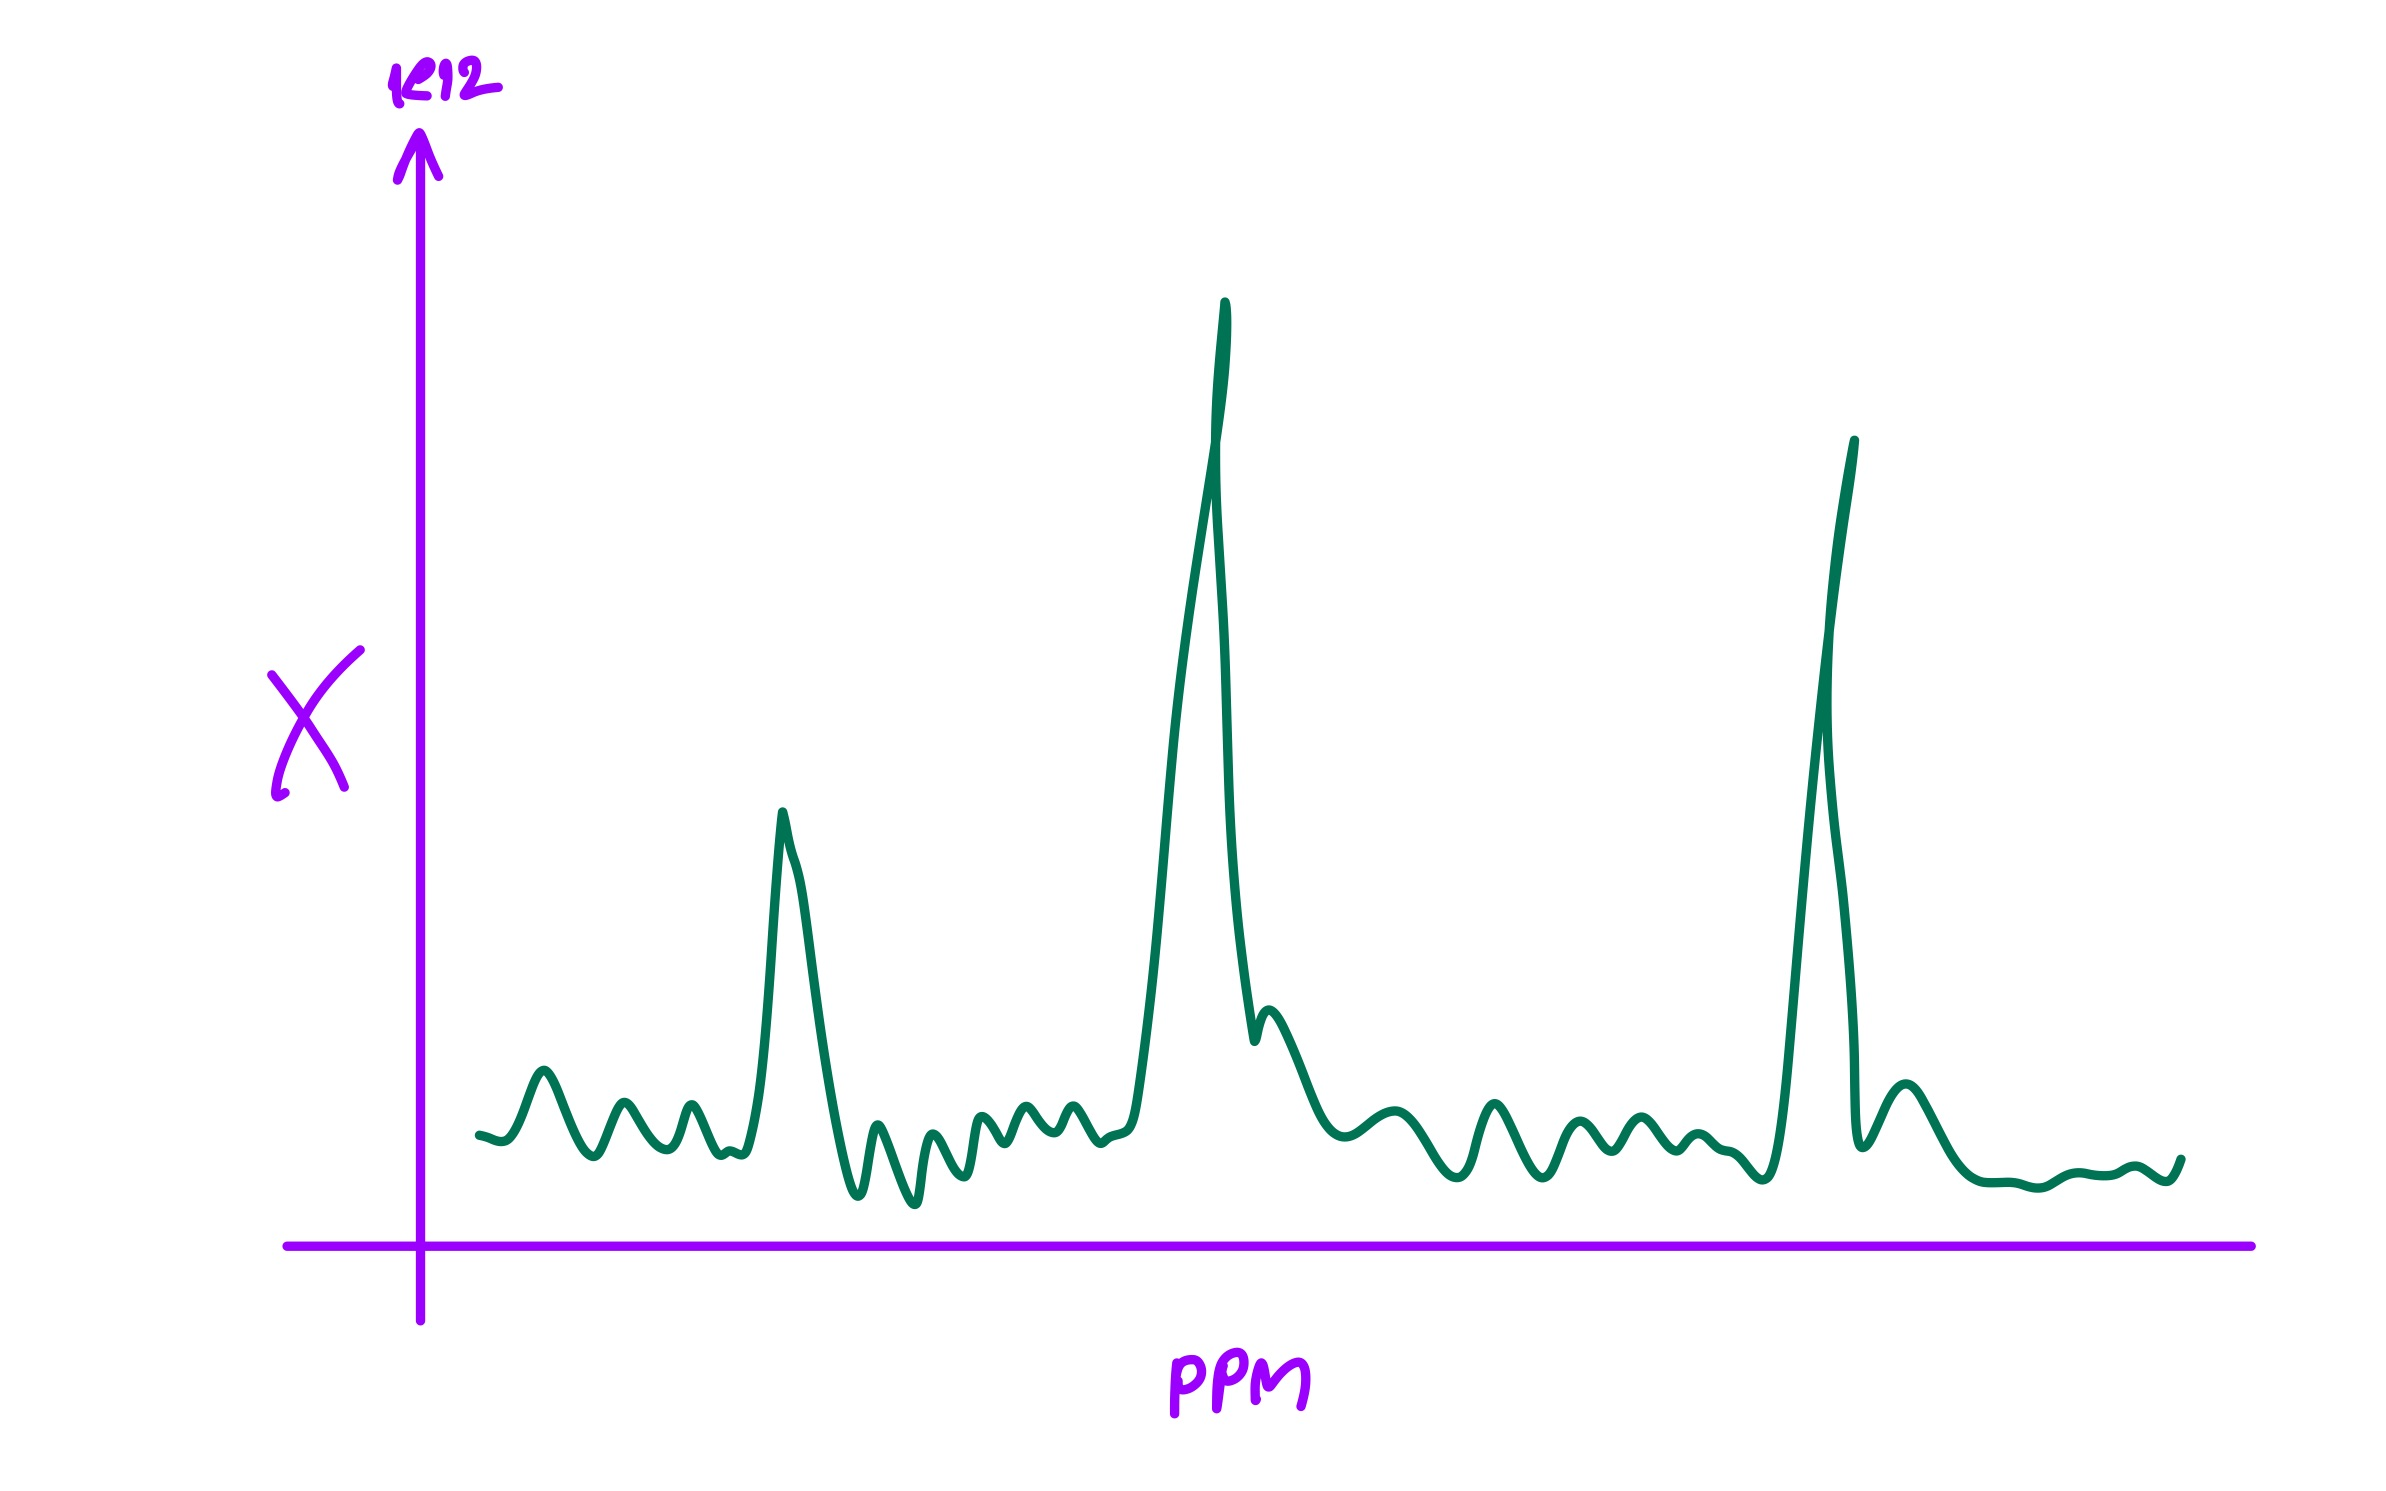

จัดการข้อมูลโดย 1 ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm $\leq$ 0 และ ppm $\geq$ 9.5)
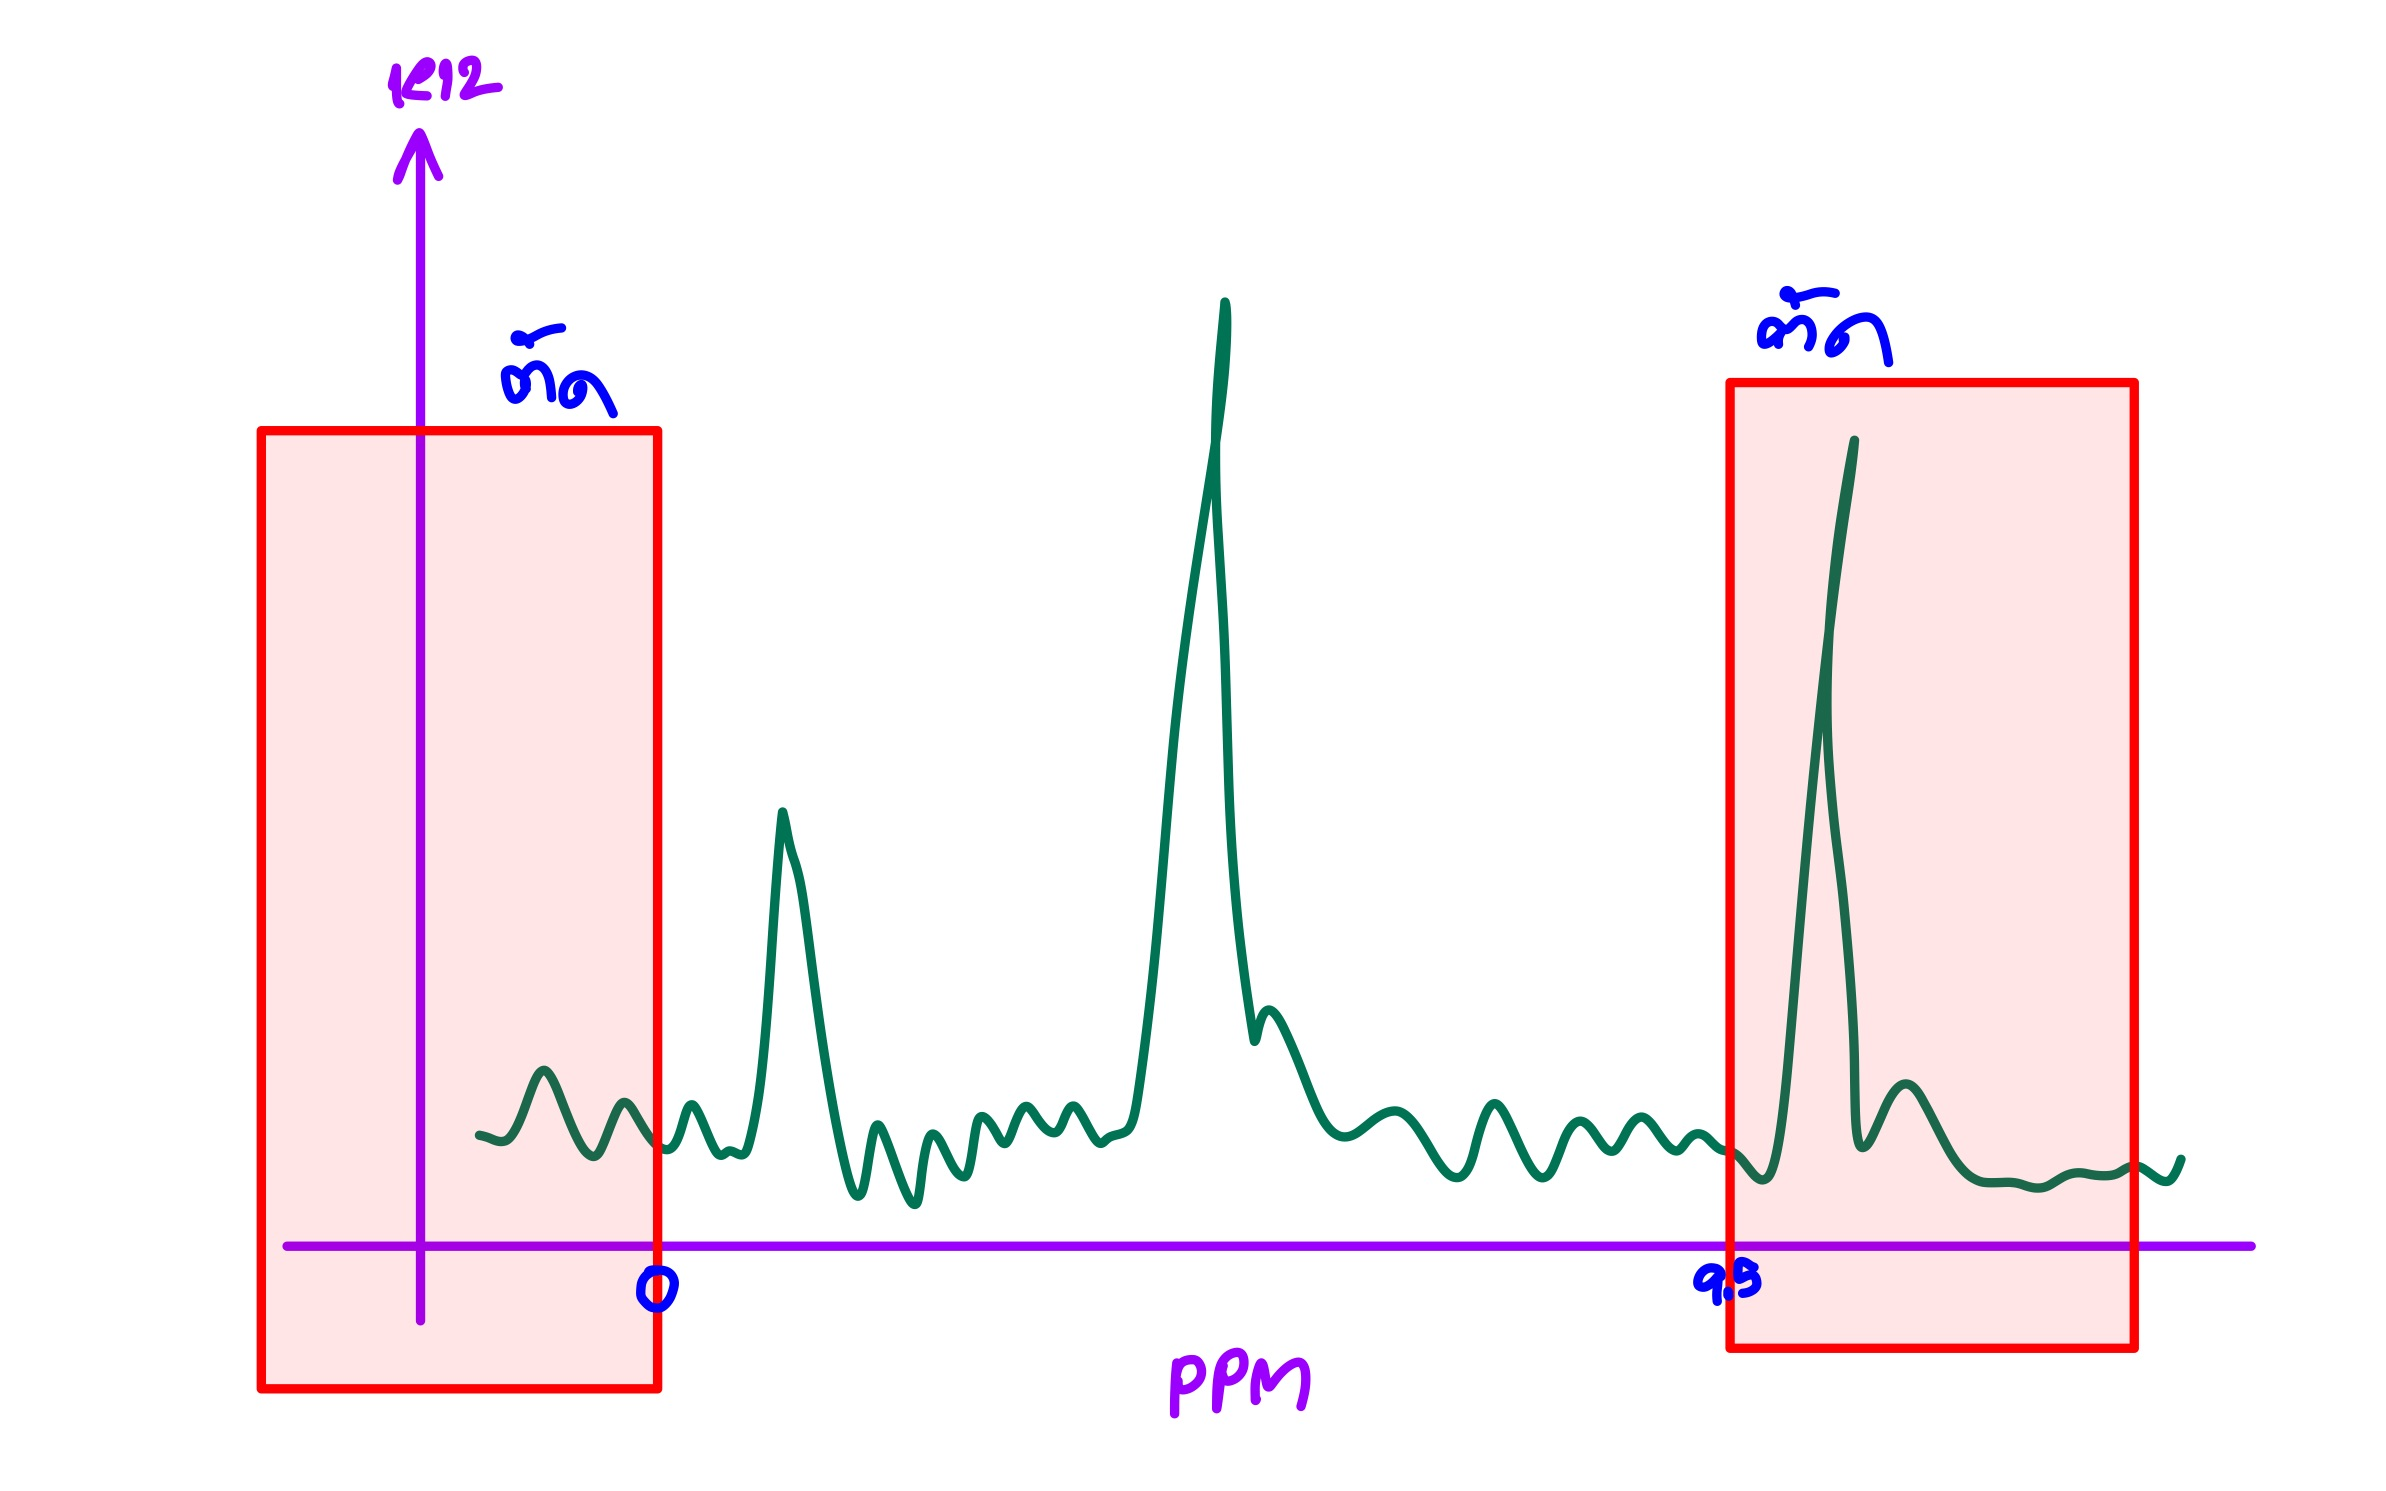

และ 2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X
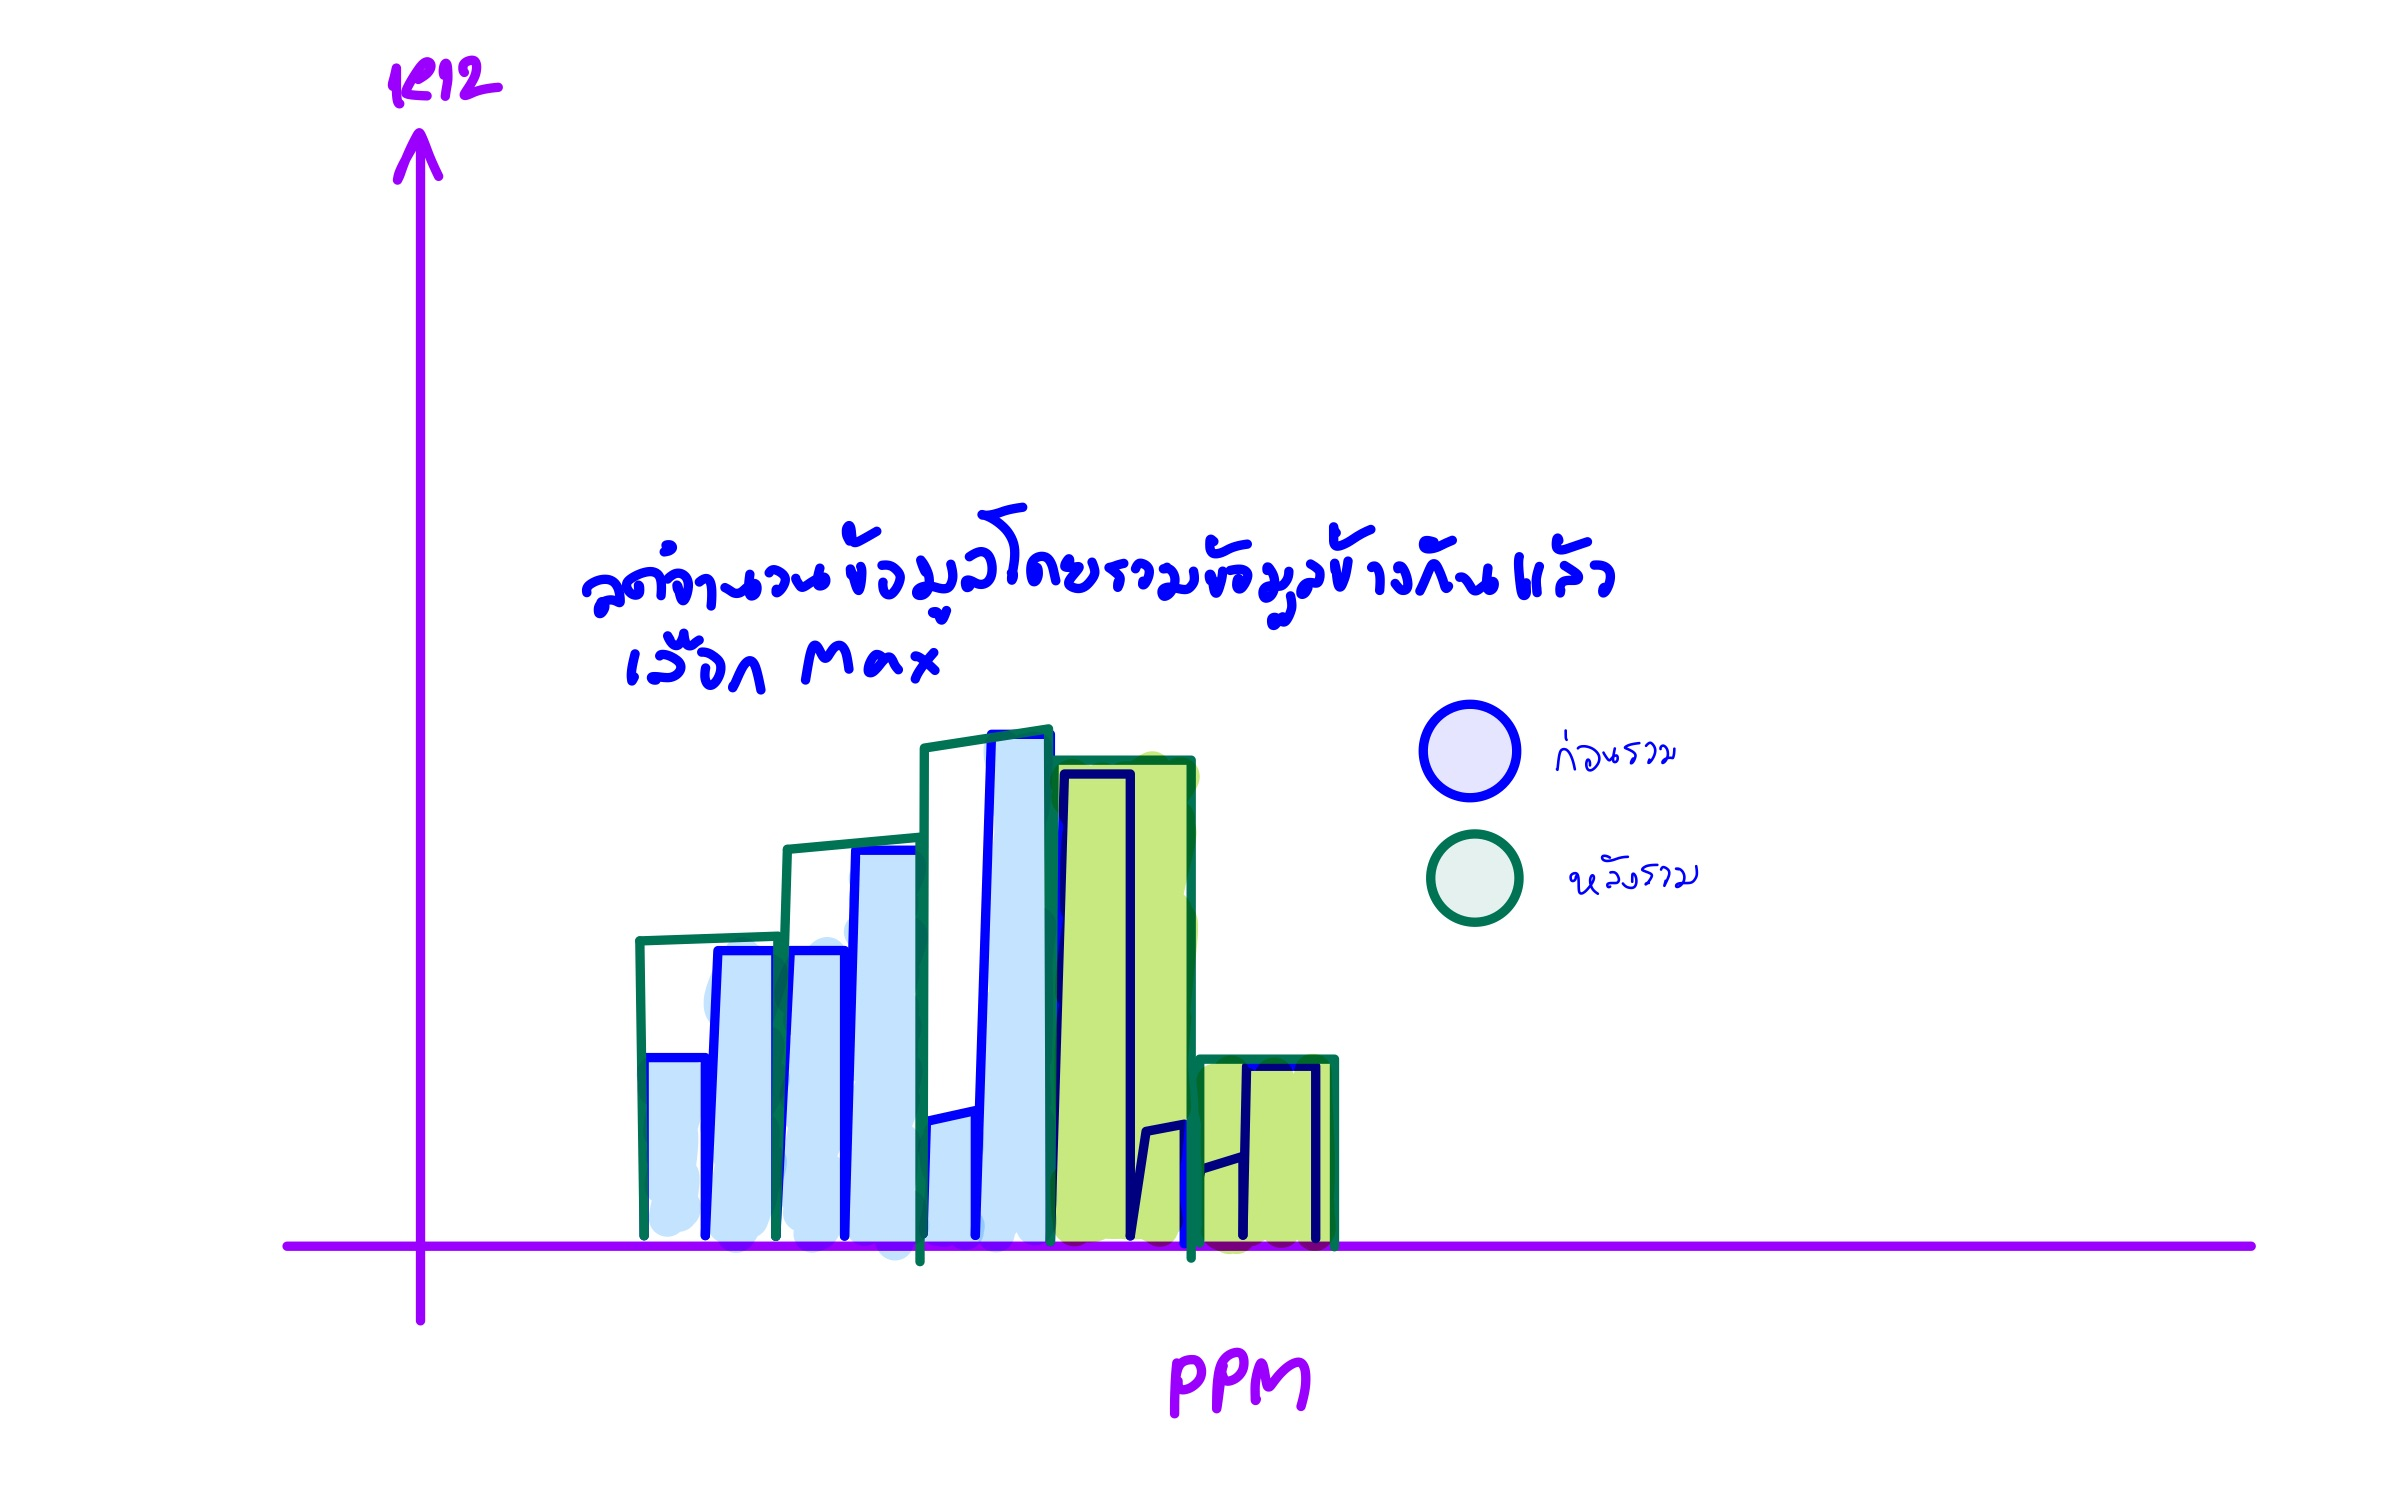

ข้อสอบ
0. preprocess ข้อมูลตามคำแนะนำข้างบน
1. ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้
2. visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น
3. ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
4. สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

In [20]:
print('นางสาวปีย์รดา ภู่ถนนนอก 653020211-6')

นางสาวปีย์รดา ภู่ถนนนอก 653020211-6


#preprocess ข้อมูลตามคำแนะนำ

In [12]:
import pickle
import os

file_path = 'Xnn_ppm.pickle'

# ฟังก์ชันสำหรับโหลดข้อมูลจากไฟล์ pickle
def load_data(file_path):
    if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
        try:
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
                return data
        except Exception as e:
            print(f"Error loading data from {file_path}: {e}")
    else:
        print(f"The file '{file_path}' does not exist or is empty.")
    return None

# โหลดข้อมูล Xnn_ppm
data = load_data(file_path)

# ตรวจสอบว่าข้อมูลถูกโหลดสำเร็จ
if data is not None:
    print("Data loaded successfully!")

    # ตรวจสอบขนาดของข้อมูล
    if isinstance(data, tuple) and len(data) == 2:
        X, ppm = data
        print(f"Shape of X: {X.shape}")
        print(f"Length of ppm: {len(ppm)}")
    else:
        print("The data does not have the expected format (tuple with X and ppm).")
else:
    print("Failed to load data.")

Data loaded successfully!
Shape of X: (51, 65536)
Length of ppm: 65536


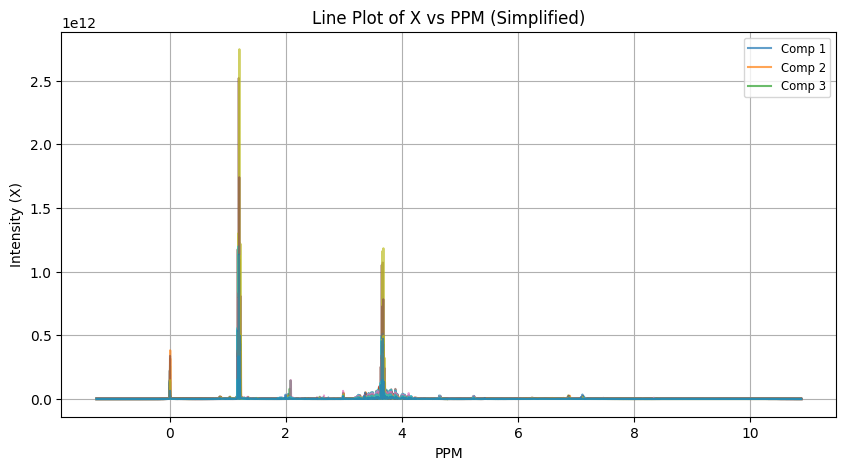

In [25]:
import matplotlib.pyplot as plt
# สร้างกราฟเส้นข้อมูลระหว่าง X กับ ppm
plt.figure(figsize=(10, 5))
for i in range(X.shape[0]):
    plt.plot(ppm, X[i], label=f'Comp {i+1}' if i < 3 else "", alpha=0.7)  # Show labels for the first few components only

plt.title('Line Plot of X vs PPM (Simplified)')
plt.xlabel('PPM')
plt.ylabel('Intensity (X)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()

In [14]:
import numpy as np

# แปลง ppm เป็น numpy array
ppm = np.array(ppm)

# ตัดข้อมูลที่อยู่นอกช่วงที่สนใจ (0 ≤ ppm ≤ 9.5)
mask = (ppm >= 0) & (ppm <= 9.5)
X_filtered = X[:, mask]  # ตัดข้อมูล X ตาม mask
ppm_filtered = ppm[mask]  # ตัดข้อมูล ppm ตาม mask

print(f"Shape of filtered X: {X_filtered.shape}")
print(f"Length of filtered ppm: {len(ppm_filtered)}")


Shape of filtered X: (51, 51318)
Length of filtered ppm: 51318


In [15]:
import numpy as np

#และ 2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X
# กำหนดจำนวนกลุ่ม (400) ที่ต้องการ
num_groups = 400

# คำนวณขนาดของแต่ละกลุ่ม
original_size = X_filtered.shape[1]
group_size = original_size // num_groups

# ทำการ quantize โดยเลือกค่า max จากแต่ละกลุ่ม
X_quantized = np.max(X_filtered[:, :group_size * num_groups].reshape(51, num_groups, group_size), axis=2)

print(f"Shape of quantized X: {X_quantized.shape}")

Shape of quantized X: (51, 400)


#ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้


In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# ทำ PCA
pca = PCA(n_components=2)  # ลดมิติเป็น 2 มิติ
X_pca = pca.fit_transform(X_quantized)

# แสดงผลลัพธ์ PCA
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.94383973 0.03409958]


#visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น

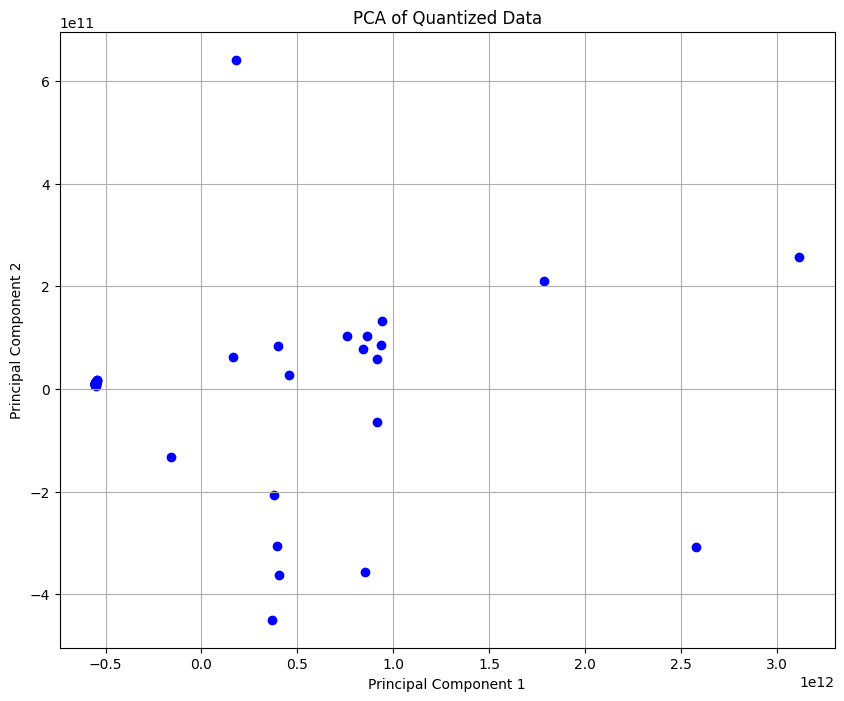

In [17]:
# สร้างกราฟ scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='blue', marker='o')
plt.title('PCA of Quantized Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

#ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี

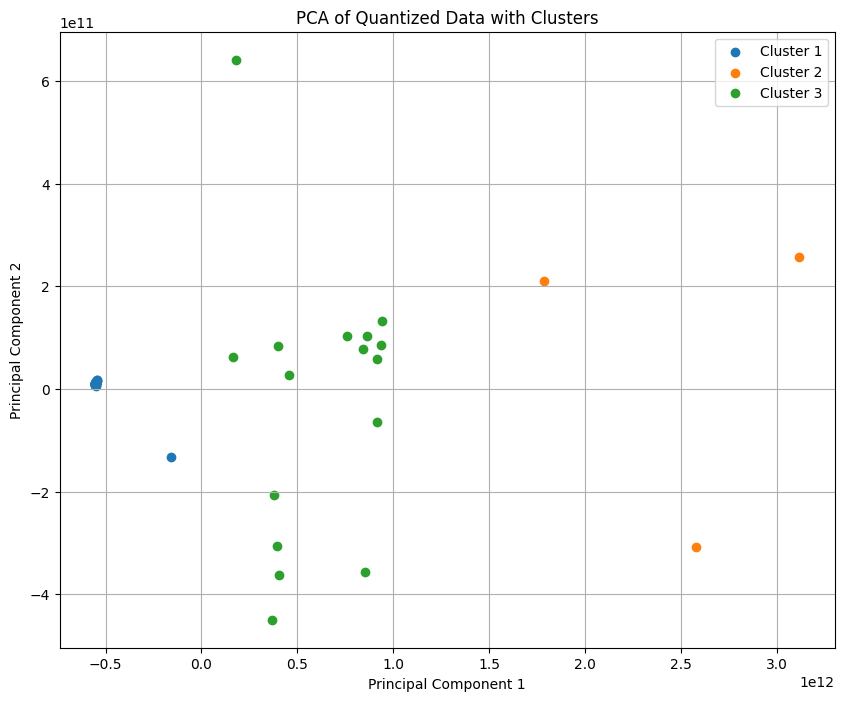

The data contains 3 clusters.


In [18]:
from sklearn.cluster import KMeans
# จำนวนกลุ่ม (สามารถปรับเปลี่ยนได้)
num_clusters = 3  # ปรับตามที่ต้องการ

# ทำ KMeans clustering
kmeans = KMeans(n_clusters=num_clusters)
labels = kmeans.fit_predict(X_pca)

# Plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i + 1}')
plt.title('PCA of Quantized Data with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

# จำนวนกลุ่มที่พบ
print(f'The data contains {num_clusters} clusters.')

Data มีทั้งหมด 3 กลุ่ม

น้ำเงิน คือ กลุ่มที่ 1

ส้ม คือ กลุ่มที่ 2

เขียว คือ กลุ่มที่ 3

#สร้างตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

In [24]:
import pandas as pd

# สร้าง DataFrame เพื่อเก็บข้อมูล
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = labels

# เปลี่ยนค่าในคอลัมน์ 'Cluster'
df['Cluster'] = df['Cluster'].replace({0: 1, 1: 2, 2: 3})

# แสดงตาราง
df

,PC1,PC2,Cluster
0,-5.510320e+11,1.114919e+10,1
1,-5.503732e+11,1.218689e+10,1
2,-5.521917e+11,1.083279e+10,1
3,-5.526674e+11,1.056511e+10,1
4,-5.467747e+11,1.529962e+10,1
5,-5.496501e+11,1.601124e+10,1
6,-5.522665e+11,1.093775e+10,1
7,-5.514448e+11,1.050829e+10,1
8,-5.513530e+11,1.111623e+10,1
9,-5.523058e+11,1.137820e+10,1


### สรุป
- ข้อมูล PCA ที่ได้มีจำนวน 51 จุด
- แบ่งออกเป็น 3 กลุ่มตามค่า Cluster
  - กลุ่ม 1: 1-31,50
  - กลุ่ม 2: 36, 39, 46
  - กลุ่ม 3: 32-35, 37-38, 40-45, 47-49, 51

### ข้อมูล Cluster
- **กลุ่ม 1** (Cluster 1) มีจุดข้อมูลทั้งหมด 32 จุด
- **กลุ่ม 2** (Cluster 2) มีจุดข้อมูลทั้งหมด 3 จุด
- **กลุ่ม 3** (Cluster 3) มีจุดข้อมูลทั้งหมด 16 จุด

ข้อมูลนี้แสดงให้เห็นว่ากลุ่ม 1 มีจำนวนจุดข้อมูลมากที่สุดเมื่อเปรียบเทียบกับกลุ่มอื่น ๆ ขณะที่กลุ่ม 2 มีจำนวนน้อยที่สุด ซึ่งเป็นข้อมูลที่สามารถใช้ในการวิเคราะห์เพิ่มเติมได้ในอนาคต!